# 梯度下降法

## 原理

一个二维线性图像可以这样表示:

$$y = \theta_{0} + \theta_{1}x$$

其中的 $y$ 表示输出, $x$ 表示输入, 我们基于已有 $m$ 项的训练集

$$(x_{i} , y_{i} ) \quad i=1,...,m $$

训练出最精确的 $\theta_{0}$ 和 $\theta_{1}$, 这样机器就学习到一个函数$h$, 因为历史原因我们把它称为假设 (hypothesis), 对于输入为 $x_{i}$ 的 $h(x)$, $\hat y_{i}$ 是其输出, 表示方法如下:
$$h(x_{i})=\theta_{0} + \theta_{1}x_{i}$$

什么叫「最精确」? 每一项 $\hat y_{i}$ 越接近 $y_{i}$ 越精确. 也就是说, 对于 $i=1,...,m$ 中的每一个 $i$, $\hat y_{i} - y$ 的和要最小, 为了摆脱正负数的困扰, 我们把每一项平方再求和, 就是 $(\hat y_{i} - y)^2$ 的和最小, 为了便于之后的求导, 再乘上 $\frac{1}{2}$. 我们把各项误差的平方和称为 $J(\theta_0, \theta_1)$, $\sum$ 表示求和, 表示方法如下:

$$J(\theta_0, \theta_1) = \dfrac {1}{2} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2} \displaystyle \sum _{i=1}^m \left (h (x_{i}) - y_{i} \right)^2 \quad i=1,2,...,m $$

注意, 在这里, $x_{i}$ 和 $y_{i}$ 均为已知量, $\theta_0, \theta_1$ 是未知量, 我们要找到 $\theta_0, \theta_1$ 使得 $J(\theta_0, \theta_1)$ 最小, 也就是误差最小. 通过求导 $J(\theta_0, \theta_1)$, 我们可以知道 $J(\theta_0, \theta_1)$ 减小时, $\theta_0, \theta_1$ 的方向, 往$J(\theta_0, \theta_1)$ 减小的方向踏出一步, 改变 $\theta_0, \theta_1$, 让 $J(\theta_0, \theta_1)$ 的值下降. 这个要理解有点难度, 我再解释一下. 现在我们把 $\theta_0$ 忽略, 那么:

$$h(x_{i})=\theta_{0}x_{i}$$

$$J(\theta_0) = \dfrac {1}{2} \sum _{i=1}^m \left (\theta_0 x_{i} - y_{i} \right)^2 \quad i=1,2,...,m$$

$J(\theta_0)$ 很明显是个二次函数, 我就假定这时化简求到的$J(\theta_0)$ 是这样: 
$$J(\theta_0) = 3\theta_0^{2} + 9$$
横轴是 $\theta_{0}$, 纵轴是 $J(\theta_{0})$, 形状呈抛物线. 用下图表示.

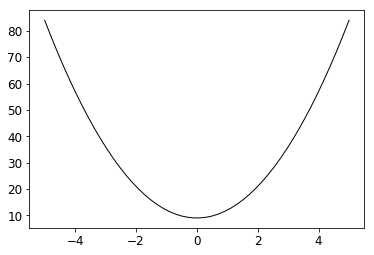

In [15]:
theta = np.linspace(-5, 5)
j = 3 * theta ** 2 + 9
plt.plot(theta, j, 'k', lw=1)
plt.show()

假如我们这时候随机取了一点, $\theta_{0}=1$, 很明显这还不是最低点, 我在这个点上求导得  $J'(1)$, 高中数学告诉我们这个值是 $\theta_{0} = 1$ 时的切线斜率.

我们先不管大小, 而是考虑它的正负号, 如果导数为正, $\theta_{0}$ 增加, $J(\theta_0)$ 增加. 导数为负, $\theta_{0}$ 增加, $J(\theta_0)$ 减小.

但我们还可以换个思路, 如果导数为正, $J(\theta_0)$ 减小, $\theta_{0}$ 减小. 导数为负, $J(\theta_0)$ 减小, $\theta_{0}$ 增加.

也就是说, 正号告诉我们若要让 $J(\theta_0)$ 减小, $\theta_{0}$ 应该减小, 往左移动. 负号告诉我们若要让 $J(\theta_0)$ 减小, $\theta_{0}$ 应该增大, 往右移动.

**我们可以看到导数的正负性是和 $\theta_{0}$ 移动方向相反的**, 导数为正就要减 $\theta_{0}$ 的值, 导数为负就要加 $\theta_{0}$ 的值. 若要让 $\theta_{0}$ 更接近最低点, 我们要与导数符号相反的方向更新 $\theta_{0}$ 的值, 用 $:=$ 表示我赋予 $\theta_0$ 一个新的值, 也就是 $\theta_{0} := \theta_{0} - J'(1) \times somevalue$

回到 $J(\theta_0, \theta_1)$, 因为 $J(\theta_0, \theta_1)$ 是个三维图像, 可以想象先在 $\theta_0$ 的方向切一刀取截面, 这就变成一个二维图像来求导, $\theta_1$ 同理, 这就是偏导数的意义.

这个求导用 $\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$ 表示, 偏导数用来判断 $J(\theta_0, \theta_1)$ 减小的方向, $\alpha$ 表示一个系数, $\alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$ 的绝对值就是步长. 踏完之后 $\theta_0, \theta_1$ 的值就不一样了, 我们获得了新的 $\theta_0, \theta_1$, 用 $:=$ 表示我赋予 $\theta_0, \theta_1$ 一个新的值.

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)\quad where \; j=1,2 $$

现在求 $\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$ 了, $j=0$ 时, 沿 $\theta_1$切一刀, 把 $\theta_1$看作常数: 

$$\theta_{0} := \theta_{0} - \alpha \sum\limits_{i=1}^{m}(\theta_{0}+\theta_{1}x_{i}-y_{i})$$

$j=1$ 同理, 因为 $\theta_1$ 有系数 $x_{i}$:

$$\theta_{1} := \theta_{1}- \alpha \sum\limits_{i=1}^{m}((\theta_{0}+\theta_{1}x_{i}-y_{i} )x_{i})$$

当 $\theta_0, \theta_1$ 已经降无可降时, 我们称此时的 $\theta_0, \theta_1$ 的值收敛, 这时的 $\theta_0, \theta_1$ 就是我们想要的结果.

## 代码实现

### 生成训练集

In [1]:
import numpy as np
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 通过rcParams设置全局横纵轴字体大小
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

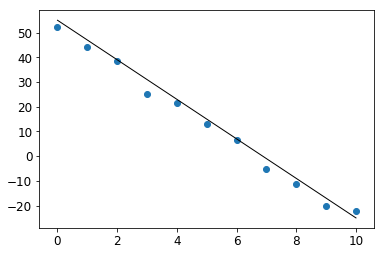

In [3]:
# np.random.seed(60)
# training size
m = 11

x = np.linspace(0, 10, m)

y = 55 - 8 * x

# add noise
y_data = y + np.random.normal(scale=3, size=m)

# name the figure as 'gd'
plt.figure('gd')

plt.plot(x, y, 'k', lw=1)
plt.scatter(x, y_data)
plt.show()

### 训练模型

$$\theta_{0} := \theta_{0} - \alpha \sum\limits_{i=1}^{m}(\theta_{0}+\theta_{1}x_{i}-y_{i})$$

$$\theta_{1} := \theta_{1}- \alpha \sum\limits_{i=1}^{m}((\theta_{0}+\theta_{1}x_{i}-y_{i} )x_{i})$$

0 0.569581286695 -0.578839547922


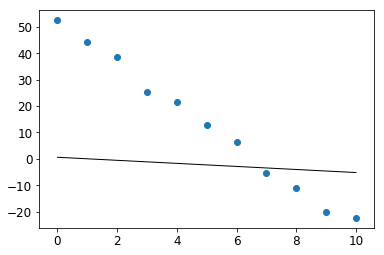

50 24.2864448195 -3.81357117713


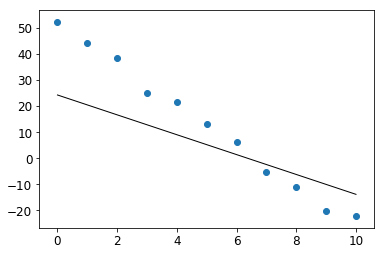

100 37.0345840538 -5.64941833407


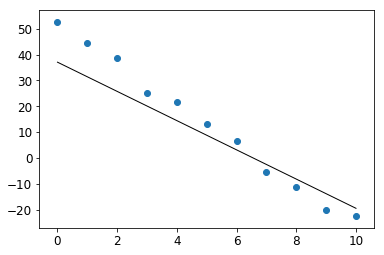

150 43.8942576728 -6.63727327349


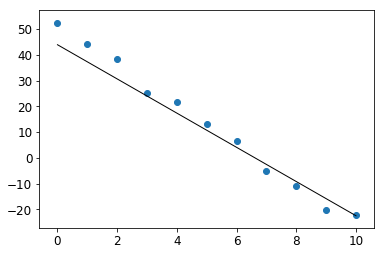

200 47.5853941826 -7.16883025941


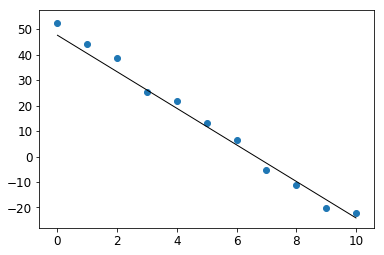

250 49.5715657544 -7.45485689955


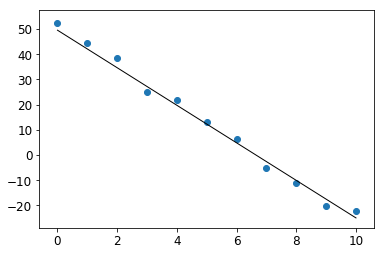

300 50.6403090811 -7.60876558864


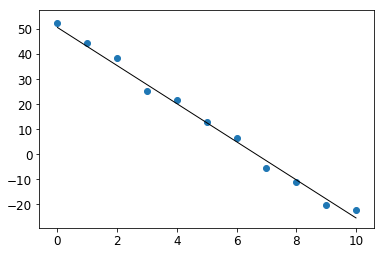

350 51.215391473 -7.69158264568


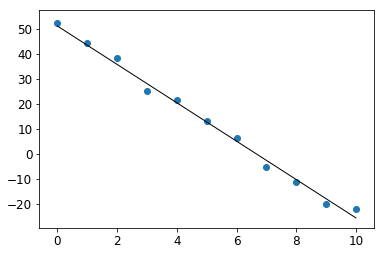

400 51.5248387924 -7.73614585377


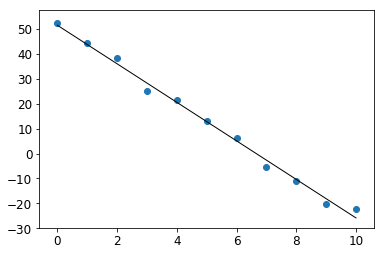

450 51.691349965 -7.76012496612


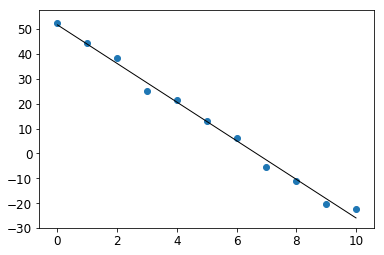

500 51.7809483195 -7.77302793818


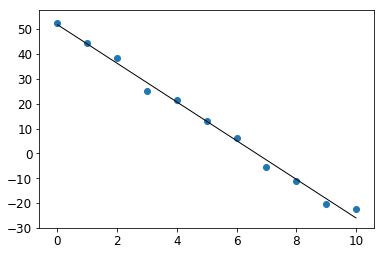

522 51.8058590502 -7.77661530832


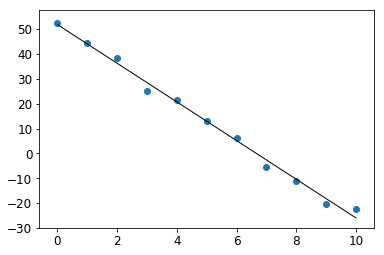

In [4]:
a = 0.004
theta_0 = 0
theta_1 = 0

for n in range(0, 601):
    temp_0 = theta_0 - (a * m * theta_0 + a * theta_1 * np.sum(x) - a * np.sum(y_data))
    temp_1 = theta_1 - (a * np.sum(theta_0 * x) + a * np.sum(theta_1*x*x) - a * np.sum(x*y_data))
    if abs(temp_0 - theta_0) < 0.001:
        print n, temp_0, temp_1
        y_train = temp_0 + temp_1 * x
        plt.plot(x, y_train, 'k', lw=1)
        plt.scatter(x, y_data)
        plt.show()
        break
    theta_0, theta_1 = temp_0, temp_1
    if n % 50 == 0:
        print n, temp_0, temp_1
        y_train = temp_0 + temp_1 * x
        plt.plot(x, y_train, 'k', lw=1)
        plt.scatter(x, y_data)
        plt.show()